In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import selfies as sf

In [2]:
data=pd.read_csv('trials/log_test.txt')

In [3]:
train_data=data[data['data_type']=="train"]
test_data=data[data['data_type']=="test"]

In [10]:
data

,epoch,batch_idx,data_type,tot_loss,recon_loss,pred_loss,kld_loss,prop_mse_loss,run_time
0,0,0,train,4.014825,4.014825,0,6.327811e-10,0.0,0.88790
1,0,1,train,2.563842,2.563842,0,4.095095e-10,0.0,0.40570
2,0,2,train,2.032074,2.032074,0,7.344587e-10,0.0,0.40520
3,0,3,train,1.847684,1.847684,0,1.326069e-09,0.0,0.40741
4,0,4,train,1.765866,1.765866,0,2.184551e-09,0.0,0.40827
...,...,...,...,...,...,...,...,...,...
352095,99,347,test,0.026071,0.001949,0,2.412203e-02,0.0,NaN
352096,99,348,test,0.025816,0.001676,0,2.413940e-02,0.0,NaN
352097,99,349,test,0.025856,0.001937,0,2.391904e-02,0.0,NaN
352098,99,350,test,0.026279,0.002245,0,2.403418e-02,0.0,NaN


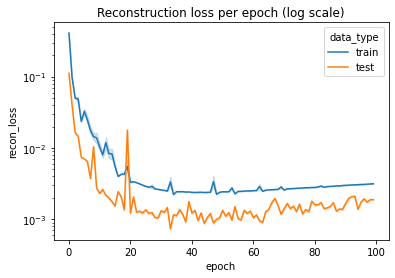

In [13]:
splot=sns.lineplot(data=data, x="epoch", y="recon_loss", hue="data_type").set(title='Reconstruction loss per epoch (log scale)',yscale="log")

[Text(0.5, 1.0, 'KLD loss per epoch')]

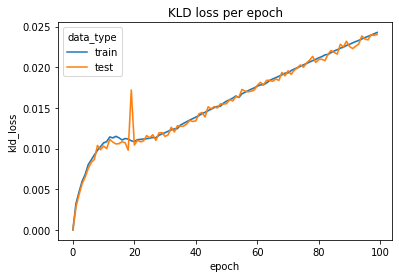

In [16]:
sns.lineplot(data=data, x="epoch", y="kld_loss", hue="data_type").set(title='KLD loss per epoch')

[Text(0.5, 1.0, 'total loss per epoch')]

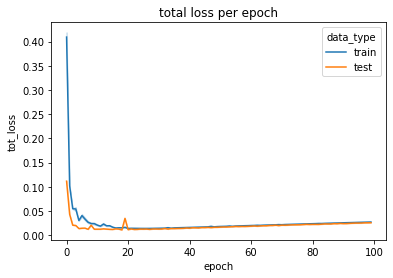

In [14]:
sns.lineplot(data=data, x="epoch", y="tot_loss", hue="data_type").set(title='total loss per epoch')

In [4]:
sample=pd.read_csv("data/sample_test_rand.txt")

In [5]:
from collections import Counter
smiles=[]
proper_selfies=[]
cnt=0
for i,selfie in enumerate(sample.mol):
    counter=Counter(selfie)
    if counter['_'] ==0:
        smiles.append(sf.decoder(selfie))
        proper_selfies.append(selfie)
    else:
        cnt+=1


    

In [113]:
cnt

284

In [2]:
sample=pd.read_csv("data/sample_test_rand_cbas_3.txt")

In [3]:
unique_selfies=list(set(sample['mol']))
unique_perct=len(unique_selfies)/len(sample['mol'])*100
print(f"the percentage of unique selfies in {len(sample['mol'])} sampled selfies is {unique_perct:.2f}%")

the percentage of unique selfies in 30204 sampled selfies is 100.00%


In [4]:
smiles=[sf.decoder(selfie) for selfie in sample['mol']]

In [6]:
smiles[0]

'CC1=NN=CC=C1NC23COCC2CC(=O)C3'

In [5]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [6]:
mol_2D=[Chem.MolFromSmiles(smi) for smi in smiles]

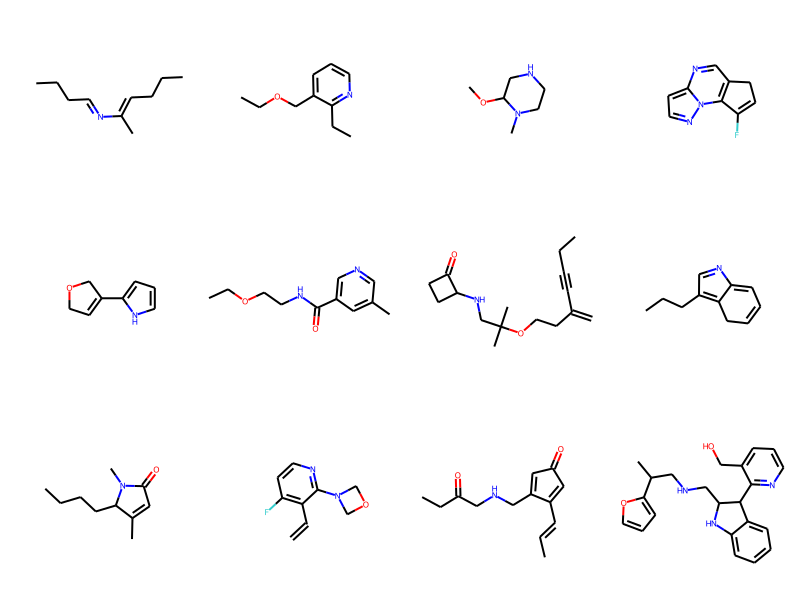

In [17]:
import random

img=Draw.MolsToGridImage(random.sample(mol_2D,12),molsPerRow=4,subImgSize=(200,200))    
img

In [7]:
%matplotlib inline
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import numpy as np
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import seaborn as sns
from rdkit.DataManip.Metric import GetTanimotoDistMat
from rdkit.DataManip.Metric import GetTanimotoSimMat
from rdkit import rdBase
from rdkit.Chem import RDConfig
print(rdBase.rdkitVersion)

2020.09.1


In [8]:
def tri2mat(tri_arr):
    n = len(tri_arr)
    m = int((np.sqrt(1 + 4 * 2 * n) + 1) / 2)
    arr = np.ones([m, m])
    for i in range(m):
        for j in range(i):
            arr[i][j] = tri_arr[i + j - 1]
            arr[j][i] = tri_arr[i + j - 1]
    return arr

In [8]:
morganfps = [AllChem.GetMorganFingerprintAsBitVect(m,2) for m in mol_2D]
len(morganfps)

30204

In [9]:
simmat = GetTanimotoSimMat(morganfps)

In [10]:
simmat.shape

(456125706,)

In [11]:
pool=pool
trunc=

when throught 0.00% of the dataset
when throught 0.00% of the dataset
when throught 0.00% of the dataset
when throught 0.01% of the dataset
when throught 0.01% of the dataset
when throught 0.01% of the dataset
when throught 0.01% of the dataset
when throught 0.02% of the dataset
when throught 0.02% of the dataset
when throught 0.02% of the dataset
when throught 0.02% of the dataset
when throught 0.02% of the dataset
when throught 0.03% of the dataset
when throught 0.03% of the dataset
when throught 0.03% of the dataset
when throught 0.03% of the dataset
when throught 0.04% of the dataset
when throught 0.04% of the dataset
when throught 0.04% of the dataset
when throught 0.04% of the dataset
when throught 0.04% of the dataset
when throught 0.05% of the dataset
when throught 0.05% of the dataset
when throught 0.05% of the dataset
when throught 0.05% of the dataset
when throught 0.05% of the dataset
when throught 0.06% of the dataset
when throught 0.06% of the dataset
when throught 0.06% 

KeyboardInterrupt: 

In [ ]:
sns.displot(simmat,kind="kde")

Error: Canceled future for execute_request message before replies were done

In [17]:
simmat = tri2mat(simmat)

In [22]:
sns.heatmap(simmat[:10000,:10000])

Error: Canceled future for execute_request message before replies were done

In [13]:
def correct_selfies(selfie):
    smile=sf.decoder(selfie)
    decode_selfie=sf.encoder(smile)
    if selfie== decode_selfie:
        return 1
    else:
        return 0
    

In [7]:
correct_cnt=0
valid_selfies=[]
for selfie in proper_selfies:
    if correct_selfies(selfie) ==1:
        correct_cnt+=1
        valid_selfies.append(selfie)




In [8]:
valid_selfies

['[C][C][C][=C][C][=N][C][Branch1][C][C][C][Ring1][=Branch1]',
 '[C][C][O][C][C][=C][Ring1][=Branch1][C][N][C][C][C][C][=Branch1][C][=O][C][Ring1][#Branch1][Ring1][O][C][C][=C][Ring1][#Branch1][C][N][C][C][Ring1][#Branch1]',
 '[C][O][C][=C][Branch1][C][Br][C][=C][Ring1][#Branch1][C][=Branch1][C][=O][C][=C][C][=N][C][=C][Ring1][=Branch1][Cl]',
 '[C][=C][N][C][Branch1][C][C][=C][Ring1][=Branch1][C][N][C][C][O][C][Ring1][=Branch1][C][=N][C][=C][Ring1][Branch1][N][Branch1][C][C][C][=N][Ring1][=Branch1]',
 '[C][C][C][C][=N][N][Branch1][C][C][C][=C][Ring1][=Branch1]',
 '[C][C][O][C][=C][Branch1][Ring1][C][O][C][=N][C][=Branch1][C][=O][O][C][C][=Branch1][C][=C][C][Branch1][C][F][=C][Ring1][=Branch1][C][O][C][C][C][=N][C][=N][C][Ring1][=Branch1]',
 '[C][Branch1][C][C][C][=Branch1][C][=O][N][C][C][C][N][C][C][Ring1][=Branch1][C][C]',
 '[C][C][Branch1][C][C][C][=N][C][Branch1][C][C][C][C][N][Ring1][#Branch1][C][Ring1][=Branch2][C]',
 '[C][C][C][C][=N][N][Branch1][C][C][C][Ring1][=Branch1][=O]',


In [9]:
correct_cnt/len(proper_selfies)*100

18.027325346614617

In [10]:
valid_selfies[0:10]

['[C][C][C][=C][C][=N][C][Branch1][C][C][C][Ring1][=Branch1]',
 '[C][C][O][C][C][=C][Ring1][=Branch1][C][N][C][C][C][C][=Branch1][C][=O][C][Ring1][#Branch1][Ring1][O][C][C][=C][Ring1][#Branch1][C][N][C][C][Ring1][#Branch1]',
 '[C][O][C][=C][Branch1][C][Br][C][=C][Ring1][#Branch1][C][=Branch1][C][=O][C][=C][C][=N][C][=C][Ring1][=Branch1][Cl]',
 '[C][=C][N][C][Branch1][C][C][=C][Ring1][=Branch1][C][N][C][C][O][C][Ring1][=Branch1][C][=N][C][=C][Ring1][Branch1][N][Branch1][C][C][C][=N][Ring1][=Branch1]',
 '[C][C][C][C][=N][N][Branch1][C][C][C][=C][Ring1][=Branch1]',
 '[C][C][O][C][=C][Branch1][Ring1][C][O][C][=N][C][=Branch1][C][=O][O][C][C][=Branch1][C][=C][C][Branch1][C][F][=C][Ring1][=Branch1][C][O][C][C][C][=N][C][=N][C][Ring1][=Branch1]',
 '[C][Branch1][C][C][C][=Branch1][C][=O][N][C][C][C][N][C][C][Ring1][=Branch1][C][C]',
 '[C][C][Branch1][C][C][C][=N][C][Branch1][C][C][C][C][N][Ring1][#Branch1][C][Ring1][=Branch2][C]',
 '[C][C][C][C][=N][N][Branch1][C][C][C][Ring1][=Branch1][=O]',


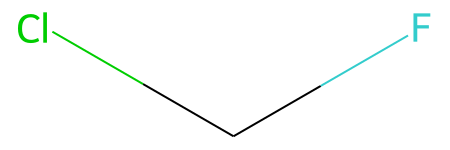

In [183]:
Chem.MolFromSmiles(sf.decoder("[C][Branch1][C][F][Cl]"))

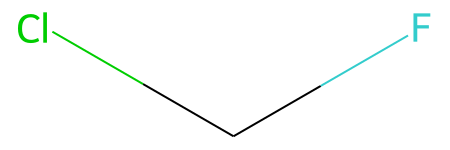

In [184]:
Chem.MolFromSmiles("C(F)Cl")

In [12]:
mol_2D=[]
for smile in smiles:
    mol_2D.append(Chem.MolFromSmiles(smile))

In [13]:
mol_2D_correct=[]
for selfie in valid_selfies:
    mol_2D_correct.append(Chem.MolFromSmiles(sf.decoder(selfie)))

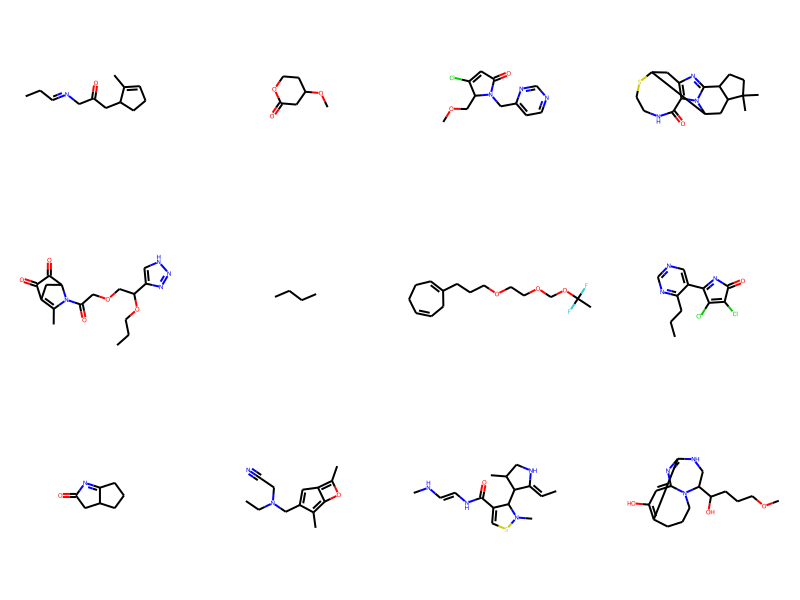

In [14]:
import random

img=Draw.MolsToGridImage(random.sample(mol_2D_correct,12),molsPerRow=4,subImgSize=(200,200))    
img

In [15]:
def ring_check(smile,ring_size=7):
    smile_length=len(smile)
    ring_status=0
    if smile_length>0 :
        m= Chem.MolFromSmiles(smile)
        for atom in m.GetAtoms():
            i=atom.GetIdx()
            temp=m.GetAtomWithIdx(i).IsInRingSize(ring_size)
            if temp:
                ring_status=1
                break
            else:
                ring_status=0
    return ring_status

In [16]:
mol=Chem.MolFromSmiles('C1COCCNC2(O)C(=O)NCC(C3=NC=CS3C)=C2C(=O)C1=O')

In [17]:
list_ring_stat=0
for smile in smiles:
    # print(i)
    # print(smile)
    ring_status=ring_check(smile=smile)
    list_ring_stat+=ring_status


In [18]:
list_ring_stat/len(smiles)*100

13.999192354287251

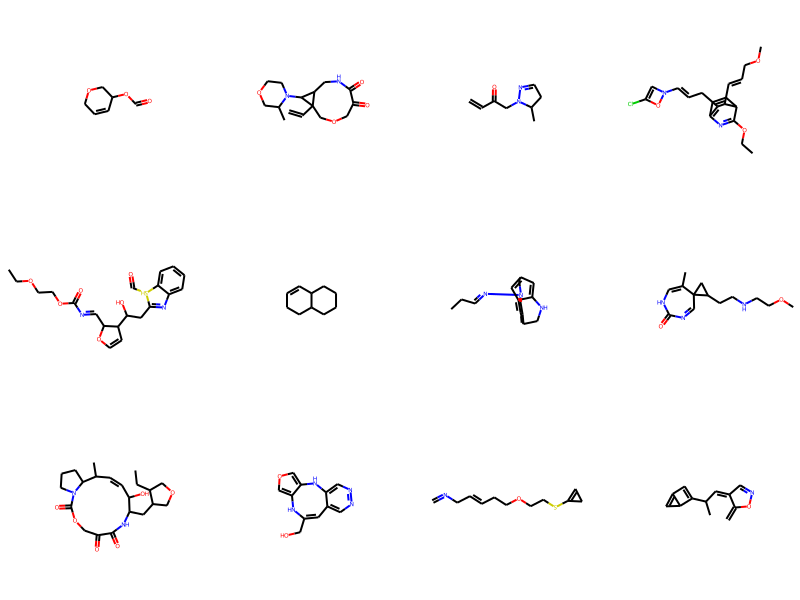

In [19]:

import random
rand_indx=random.sample(range(0,len(mol_2D)),12)
img=Draw.MolsToGridImage(random.sample(mol_2D,12),molsPerRow=4,subImgSize=(200,200))    
img

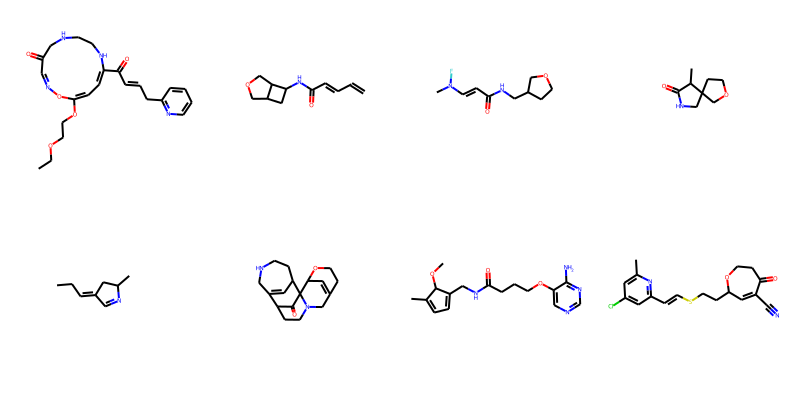

In [160]:
img=Draw.MolsToGridImage(mol_2D[:8],molsPerRow=4,subImgSize=(200,200))
img

In [20]:
from syba.syba import SybaClassifier
syba = SybaClassifier()
syba.fitDefaultScore()

syba_scores = []
for smile in smiles:
    syba_scores.append(syba.predict(smi=smile))

    
    

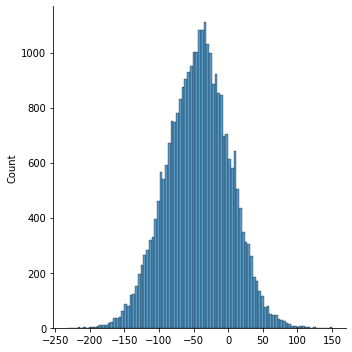

In [21]:
syba_pd=pd.Series(syba_scores)
sns.displot(syba_scores)

In [22]:
syba_dataframe=pd.DataFrame()
syba_dataframe['smiles']=pd.Series(smiles)
syba_dataframe['syba']=pd.Series(syba_scores)

In [23]:
syba_dataframe

,smiles,syba
0,CCOCCOC1=CC=C(NCCNCC(=O)C=NO1)C(=O)C=CCC2=NC=C...,-37.927110
1,C1C2COCC2C1NC(=O)C=CC=C,-52.028336
2,C1COCC1CNC(=O)C=CN(F)C,25.429889
3,C1OCCC12CNC(=O)C2C,-29.470305
4,CCC=C1C=NC(C)C1,-37.646831
...,...,...
29711,C1CC=NC(NCC12)CC=C3OCC(CC4=CC=C(F)C=C4)=C2N3,-52.559856
29712,C1CCCC1=O,8.718969
29713,C=COCOCC(N(C)NC1=CN=CC2=C1OCC3=C2[NH1])C=N3,-71.913515
29714,CCOCCOC1=CC=CC=C1OC,82.824052


In [25]:
goodsmiles=syba_dataframe[syba_dataframe['syba']> -18.5]

In [26]:
mol_2D_syba=[]
for smile in goodsmiles['smiles']:
    mol_2D_syba.append(Chem.MolFromSmiles(smile))

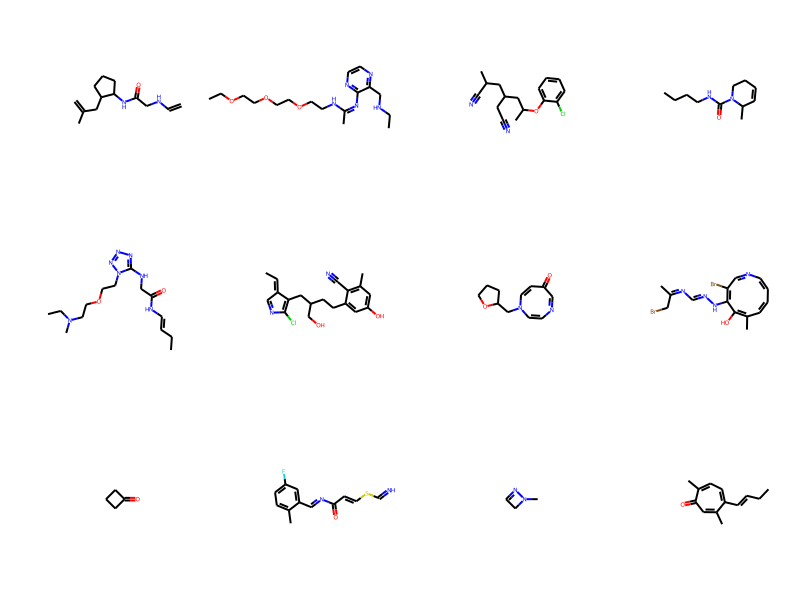

In [103]:
img=Draw.MolsToGridImage(random.sample(mol_2D_syba,12),molsPerRow=4,subImgSize=(200,200))    
img

In [34]:
from rdkit import Chem
from rdkit.Chem import RDConfig
import os
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
# now you can import sascore!
import sascorer
mol = Chem.MolFromSmiles('NC(=O)c1ccccc1')
s = sascorer.calculateScore(mol)

In [35]:
SA_score=[]
for mol in mol_2D:
    SA_score.append(sascorer.calculateScore(mol))

In [36]:
from rdkit.Chem import QED
QED_score=[]
for mol in mol_2D:
    QED_score.append(QED.qed(mol))

In [37]:
syba_dataframe['SA_score']=pd.Series(SA_score)
syba_dataframe['QED']=pd.Series(QED_score)

In [38]:
good_SA_smiles=syba_dataframe[syba_dataframe['SA_score']<4.5]

In [39]:
mol_2D_SAscore=[]
for smile in good_SA_smiles['smiles']:
    mol_2D_SAscore.append(Chem.MolFromSmiles(smile))

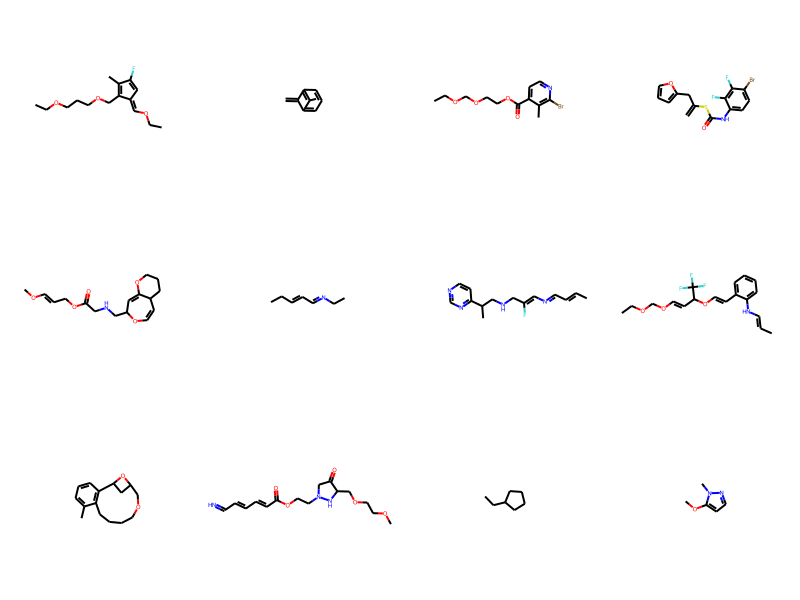

In [40]:
img=Draw.MolsToGridImage(random.sample(mol_2D_SAscore,12),molsPerRow=4,subImgSize=(200,200))    
img

In [115]:
good_smiles_2c=syba_dataframe[(syba_dataframe.syba>-18.5) & (syba_dataframe.QED>0.5)]

In [116]:
good_smiles_2c

,smiles,syba,SA_score,QED
2,C1COCC1CNC(=O)C=CN(F)C,25.429889,3.610969,0.531940
6,CC1=CC=C(CNC(=O)CCCOC2=CN=CN=C2N)C1OC,25.961024,3.528540,0.699554
10,CCOC=CCCOC1=NC=CC(F)=C1CC,0.545433,2.878653,0.540919
11,CCC1=N[NH1]C=C1CCCCCCOC2=CC=CC=C2,95.974119,2.361179,0.696163
12,C1OC=C(Br)C=C1C(=O)C2=CC=NC=C2Cl,3.293010,3.248699,0.787867
...,...,...,...,...
29694,C1OCCCC(F)COCC1CC,-11.184645,4.038783,0.630631
29700,CC1=CC=CN=C1OC2=NC(C)=CN=C2CCC(C(F)F)COC=O,19.648701,3.771798,0.645689
29701,COC1=C(F)C=CC=C1NC(CC)C2=CC=C(Cl)C(OC)=CCC2,-6.691842,3.573753,0.744091
29709,CC(CN1CC(=O)NC#CCC(=O)CN)C1C,-16.606703,4.260224,0.501700


In [117]:
mol_2D_good=[]
for smile in good_smiles_2c['smiles']:
    mol_2D_good.append(Chem.MolFromSmiles(smile))

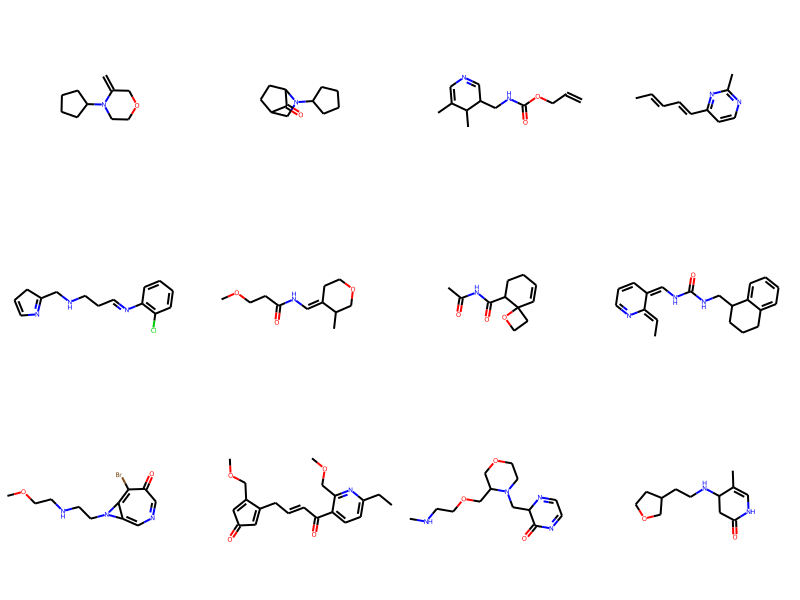

In [118]:
img=Draw.MolsToGridImage(random.sample(mol_2D_good,12),molsPerRow=4,subImgSize=(200,200))    
img

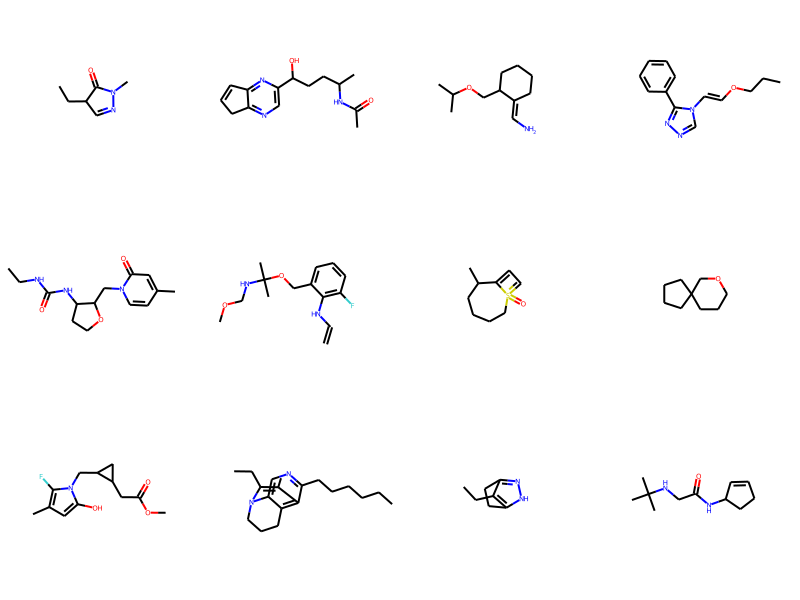

In [119]:
img=Draw.MolsToGridImage(mol_2D_good[12:24],molsPerRow=4,subImgSize=(200,200))    
img

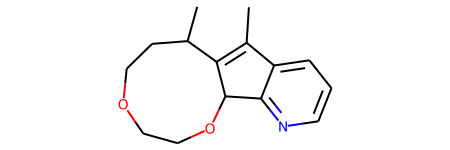

In [68]:
mol_2D_good[16]


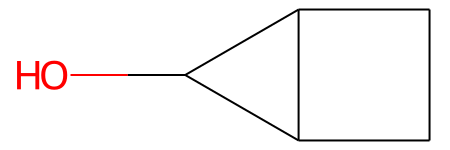

In [63]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
m

In [70]:
ssr=Chem.GetSymmSSSR(mol_2D_good[16])

In [73]:
# len(ssr)
for cycle in ssr:
    print(len(list(cycle)))

9
6
5


In [120]:
pure_smile=[]
for smile in good_smiles_2c['smiles']:
    bad_ring=False
    mol=Chem.MolFromSmiles(smile)
    ssr=Chem.GetSymmSSSR(mol)
    if ssr:
        for ring in ssr:
            if len(list(ring))>6:
                bad_ring=True
                break
            else:
                pass
    if bad_ring:
        pass
    else:
        pure_smile.append(smile)


In [121]:
len(pure_smile)

4535

In [122]:
mol_2D_pure=[]
for smile in pure_smile:
    mol_2D_pure.append(Chem.MolFromSmiles(smile))

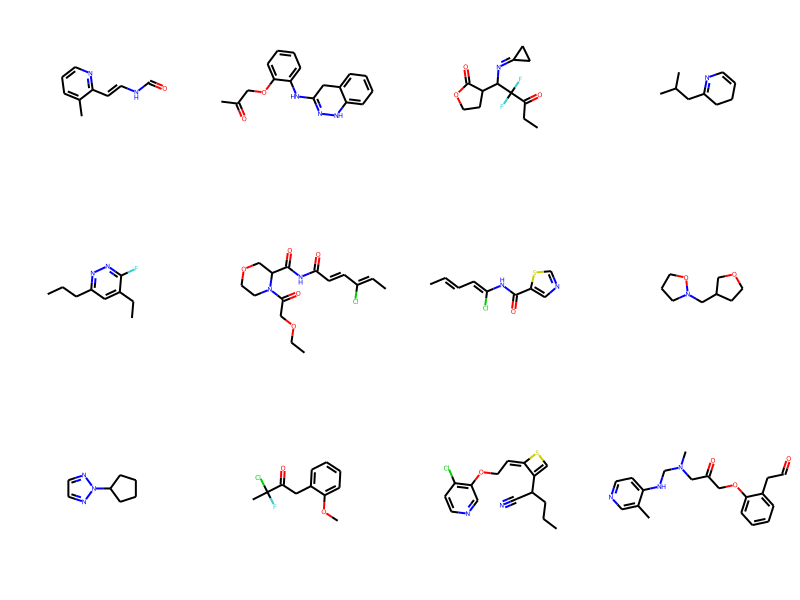

In [136]:
img=Draw.MolsToGridImage(random.sample(mol_2D_pure,12),molsPerRow=4,subImgSize=(200,200))    
img

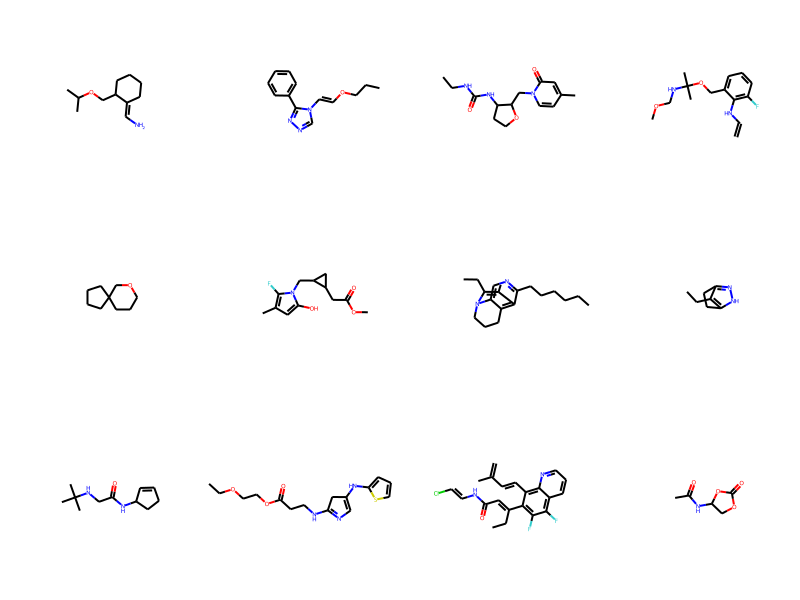

In [131]:
img=Draw.MolsToGridImage(mol_2D_pure[12:24],molsPerRow=4,subImgSize=(200,200))    
img

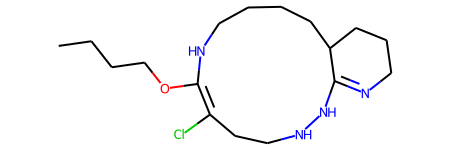